# Exploración de Datos Multivariados
## Tecnicatura Universitaria en Procesamiento y Explotación de Datos - Facultad de Ingeniería (UNER)
### Carrozzo, Felipe - Ré, Lautaro

---

### Entrega N°2

#### Importo los datasets limpios de Gualeguay

In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)
library(pwr)
library(lsr)
library(stringr)
# library(rstatix)
# library(dmwr2)
library(scatterplot3d)
# library(ggally)
library(devtools)
library(aplpack)
# library(hotelling)
library(heplots)
library(psych)
library(factoextra)

In [2]:
#ESCRITORIO
original <- read_excel("C:/Users/usr/Documents/TUPED/2doAño/Exploracion_Multivariados/1_datasetsLimpios/GUALEGUAY_original.xlsx")
primaria <- read_excel("C:/Users/usr/Documents/TUPED/2doAño/Exploracion_Multivariados/1_datasetsLimpios/GUALEGUAY_primaria.xlsx")

#PORTATIL
# original <- read_excel("C:/Users/Usuario/OneDrive/Documentos/EDM/GUALEGUAY_original.xlsx")
# primaria <- read_excel("C:/Users/Usuario/OneDrive/Documentos/EDM/GUALEGUAY_primaria.xlsx")

In [4]:
names(primaria)

[1] "CUE"                "departamento"       "localidad"         
 [4] "codigoPostal"       "anioLectivo"        "esPrivada"         
 [7] "esMultianio"        "nivelEnsenanza"     "modEnsenanza"      
[10] "turno"              "idAlumno"           "documento"         
[13] "asignatura"         "periodoEvaluatorio" "notaPrimerT"       
[16] "notaSegundoT"       "notaTercerT"        "promedio"          
[19] "resultado"          "anioCursado"

# **Comparación de Medias y Puntuación Z**

### ¿Hay diferencias significativas entre el rendimiento en Matemática de primer año del turno tarde y del turno mañana?

#### H0: No existe una diferencia significativa en los promedios de Matemática de primer año en turno mañana y turno tarde de primaria.
#### H1: Existe una diferencia significativa en los promedios de Matemática de primer año en turno mañana y tarde de primaria.

In [5]:
#filtro las variables PRIMARIA
mMatematicaP <- filter(primaria, asignatura == "MATEMATICA", anioCursado == "PRIMERO", turno == "MAÑANA")
tMatematicaP <- filter(primaria, asignatura == "MATEMATICA", anioCursado == "PRIMERO", turno == "TARDE")
#omito NA
mMatematicaP <- na.omit(mMatematicaP)
tMatematicaP <- na.omit(tMatematicaP)

In [6]:
#Normalidad
shapiro.test(mMatematicaP$promedio)
shapiro.test(tMatematicaP$promedio)
#Homocedasticidad
var.test(mMatematicaP$promedio, tMatematicaP$promedio)


	Shapiro-Wilk normality test

data:  mMatematicaP$promedio
W = 0.9534, p-value = 1.467e-11



	Shapiro-Wilk normality test

data:  tMatematicaP$promedio
W = 0.96131, p-value = 1.724e-11



	F test to compare two variances

data:  mMatematicaP$promedio and tMatematicaP$promedio
F = 0.93095, num df = 506, denom df = 601, p-value = 0.4039
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7879295 1.1012770
sample estimates:
ratio of variances 
         0.9309521 


No se cumplen los supuestos de normalidad. Si de varianza. Por lo tanto realizamos Wilcoxon Test.

In [7]:
wilcox.test(mMatematicaP$promedio,tMatematicaP$promedio, alternative = c("two.sided"), paired = FALSE,
exact = NULL, correct = TRUE, conf.int = FALSE, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  mMatematicaP$promedio and tMatematicaP$promedio
W = 151742, p-value = 0.8701
alternative hypothesis: true location shift is not equal to 0


No existe suficiente evidencia estadística para rechazar H0. Como se puede apreciar, el P-value de este análisis es 
0.8701, por lo tanto no hay una diferencia significativa entre la media de cada grupo.

---

#### **Si un estudiante de tercer año de una escuela de su departamento obtuvo un 5 en Matemática, ¿cómo le fue respecto a los puntajes obtenidos en su curso?**

In [8]:
#PRIMARIA - puntuación Z. Puntuación bruta: 5
media_terceroP <- filter(primaria, anioCursado == "TERCERO", asignatura == "MATEMATICA")
media_terceroP <- na.omit(media_terceroP)
mediaP <- mean(media_terceroP$promedio)
mediaP
desvP <- sd(media_terceroP$promedio)

print("Puntuación Z")
z = (5-mediaP)/desvP
z

[1] 8.232967

[1] "Puntuación Z"


[1] -3.172632

Los estudiantes que obtengan un 5 en MATEMATICA estando en tercer grado de la Primaria estarían 3.17 desviaciones estandar por debajo de la media de este grupo. 

---

#### ¿Podría afirmar que la media de su departamento en las notas de Matemática de primer año estuvo por encima de 7?
#### H0: media >=7
#### H1: media <7


In [9]:
matDepto <- filter(original, asignatura == "MATEMATICA", anioCursado == "PRIMERO")
matDepto <- select(matDepto,promedio)
matDepto <- na.omit(matDepto)

matDeptoMedia <- mean(matDepto$promedio)
matDeptoMedia

[1] 7.7088

In [10]:
shapiro.test(matDepto$promedio)
mean(matDepto$promedio)
median(matDepto$promedio)


	Shapiro-Wilk normality test

data:  matDepto$promedio
W = 0.96057, p-value < 2.2e-16


[1] 7.7088

[1] 8

No proviene de una distribución normal

In [11]:
wilcox.test(matDepto$promedio,alternative = c("two.sided"), paired = FALSE, exact = NULL, correct = TRUE,
            conf.int = FALSE, conf.level = 0.95, mu = 7) #mu = valor que quiero contrastar


	Wilcoxon signed rank test with continuity correction

data:  matDepto$promedio
V = 1140056, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 7


Cuento con evidencia para rechazar H0. Por ende concluyo que la media de mi departamento en las notas Matemática de primer año estuvo por debajo de 7

---

### **En su departamento, ¿hay diferencias significativas en el rendimiento en Matemática entre el turno tarde y del turno mañana? También compare con Lengua.**

In [12]:
desempenioDepto <- select(original, asignatura, anioCursado, turno, promedio)
desempenioDepto <- na.omit(desempenioDepto)

In [13]:
#MATEMATICA
mat <- filter(desempenioDepto, asignatura == "MATEMATICA", turno == "MAÑANA"|turno == "TARDE")
matProm <- aggregate(promedio ~ anioCursado + turno, data = mat, FUN = mean)

tabla_comparativaMatem <- reshape2::dcast(matProm, anioCursado ~ turno, value.var = "promedio", mean)
# Ordeno la tabla
tabla_comparativaMatem$anioCursado <- factor(tabla_comparativaMatem$anioCursado, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO'))
tabla_ordenadaMatem <- tabla_comparativaMatem[order(tabla_comparativaMatem$anioCursado), ]
tabla_ordenadaMatem
#-------
#LENGUA
lengua <- filter(desempenioDepto, asignatura == "LENGUA", turno == "MAÑANA"|turno == "TARDE")
lenguaProm <- aggregate(promedio ~ anioCursado + turno, data = lengua, FUN = mean)

tabla_comparativaLengua <- reshape2::dcast(lenguaProm, anioCursado ~ turno, value.var = "promedio", mean)
# Ordeno la tabla
tabla_comparativaLengua$anioCursado <- factor(tabla_comparativaLengua$anioCursado, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO'))
tabla_ordenadaLengua <- tabla_comparativaLengua[order(tabla_comparativaLengua$anioCursado), ]
tabla_ordenadaLengua

,anioCursado,MAÑANA,TARDE
2,PRIMERO,7.523056,7.833011
4,SEGUNDO,7.801034,7.696019
6,TERCERO,7.268524,7.581647
1,CUARTO,7.698955,6.968669
3,QUINTO,7.525181,7.553370
5,SEXTO,7.608969,7.276756


,anioCursado,MAÑANA,TARDE
2,PRIMERO,8.070020,8.130034
4,SEGUNDO,8.296891,8.222707
6,TERCERO,8.145804,8.247447
1,CUARTO,8.091019,7.932746
3,QUINTO,7.882483,7.948602
5,SEXTO,7.865888,7.923487


In [14]:
#SUPUESTOS PARA MATEMATICA
print("Matematica")
shapiro.test(tabla_ordenadaMatem$MAÑANA)
shapiro.test(tabla_ordenadaMatem$TARDE)
var.test(tabla_ordenadaMatem$MAÑANA,tabla_ordenadaMatem$TARDE)
#SUPUESTOS PARA LENGUA
print("Lengua")
shapiro.test(tabla_ordenadaLengua$MAÑANA)
shapiro.test(tabla_ordenadaLengua$TARDE)
var.test(tabla_ordenadaLengua$MAÑANA,tabla_ordenadaLengua$TARDE)

[1] "Matematica"



	Shapiro-Wilk normality test

data:  tabla_ordenadaMatem$MAÑANA
W = 0.95624, p-value = 0.7904



	Shapiro-Wilk normality test

data:  tabla_ordenadaMatem$TARDE
W = 0.93315, p-value = 0.6046



	F test to compare two variances

data:  tabla_ordenadaMatem$MAÑANA and tabla_ordenadaMatem$TARDE
F = 0.3403, num df = 5, denom df = 5, p-value = 0.2618
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0476192 2.4319494
sample estimates:
ratio of variances 
          0.340305 


[1] "Lengua"



	Shapiro-Wilk normality test

data:  tabla_ordenadaLengua$MAÑANA
W = 0.93128, p-value = 0.59



	Shapiro-Wilk normality test

data:  tabla_ordenadaLengua$TARDE
W = 0.82401, p-value = 0.09555



	F test to compare two variances

data:  tabla_ordenadaLengua$MAÑANA and tabla_ordenadaLengua$TARDE
F = 1.1791, num df = 5, denom df = 5, p-value = 0.861
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.164986 8.425962
sample estimates:
ratio of variances 
          1.179053 


**Los supuestos se cumplen para Matemática y para Lengua**

### H0: Existen diferencias significativas en el rendimiento de Matemática entre los turnos.
### H1: No existen diferencias significativas en el rendimiento de Matemática entre los turnos.

In [15]:
print("T-test MATEMATICA")
t.test(x=tabla_ordenadaMatem$MAÑANA, y=tabla_ordenadaMatem$TARDE, alternative="two.sided", paired=FALSE, var.equal=TRUE, conf.level=0.97)

[1] "T-test MATEMATICA"



	Two Sample t-test

data:  tabla_ordenadaMatem$MAÑANA and tabla_ordenadaMatem$TARDE
t = 0.58175, df = 10, p-value = 0.5736
alternative hypothesis: true difference in means is not equal to 0
97 percent confidence interval:
 -0.2877757  0.4598578
sample estimates:
mean of x mean of y 
 7.570953  7.484912 


No cuento con evidencia suficiente para rechazar H0. Por ende, concluimos que no existen diferencias significativas en el rendimiento académico de los estudiantes de Matemática entre los turnos mañana y tarde.


**Tamaño del efecto**

### H0: Existen diferencias significativas en el rendimiento de Lengua entre los turnos.
### H1: No existen diferencias significativas en el rendimiento de Lengua entre los turnos.

In [16]:
print("T-Test LENGUA")
t.test(x=tabla_ordenadaLengua$MAÑANA, y=tabla_ordenadaLengua$TARDE, alternative="two.sided", paired=FALSE, var.equal=TRUE, conf.level=0.97)

[1] "T-Test LENGUA"



	Two Sample t-test

data:  tabla_ordenadaLengua$MAÑANA and tabla_ordenadaLengua$TARDE
t = -0.097175, df = 10, p-value = 0.9245
alternative hypothesis: true difference in means is not equal to 0
97 percent confidence interval:
 -0.2382228  0.2205830
sample estimates:
mean of x mean of y 
 8.058684  8.067504 


No cuento con evidencia suficiente para rechazar H0. Por ende, concluimos que no existen diferencias significativas en el rendimiento académico de los estudiantes de Lengua entre los turnos mañana y tarde.


---


# **Comparación de Medias (2da parte)**

In [17]:
matrSecundaria <- read_excel("C:/Users/usr/Documents/TUPED/2doAño/Exploracion_Multivariados/1_datasetsLimpios/secundaria3.xlsx")

### Realizo una exploración de los datos

In [18]:
head(matrSecundaria)
unique(matrSecundaria$Departamento)

Cue_Anexo,Nivel,Modalidad_Educ_Gral,Cue,Estado,Sector,Departamento,NINA,Cant_Secciones,Tipo_titulo,...,Segundo,Tercero,Cuarto,Quinto,Sexto,Septimo,Mat_ciclo_basico,Mat_ciclo_orientado,Matricula_Total,Titulo
600003600,Secundaria,Común,6000036,Activo,ESTATAL,NA,no,18,Ciclo básico/ educación secundaria básica,...,79,73,65,54,61,0,219,180,399,Bachiller en ciencias sociales y humanidades; Bachiller en economía y administración
600035000,Secundaria,Común,6000350,Activo,ESTATAL,NA,no,6,Ciclo básico/ educación secundaria básica,...,17,11,9,7,7,0,44,23,67,Bachiller en economía y administración
600046400,Secundaria,Común,6000464,Activo,ESTATAL,FEDERACION,no,13,Ciclo básico/ educación secundaria básica,...,60,32,39,43,NA,0,157,99,256,Bachiller con orientación en arte; Bachiller en economía y administración
600067800,Secundaria,Común,6000678,Activo,ESTATAL,NA,no,17,Ciclo básico/ educación secundaria básica,...,45,47,41,37,40,0,127,118,245,Bachiller en ciencias naturales; Bachiller en economía y administración
600093400,Secundaria,Común,6000934,Activo,ESTATAL,VILLAGUAY,no,37,Ciclo básico/ educación secundaria básica,...,146,103,184,120,73,0,345,377,722,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración; Bachiller orientado en ciencias naturales; Bachiller con orientación en ciencias sociales y humanidades
600110200,Secundaria,Común,6001102,Activo,ESTATAL,NA,no,14,Ciclo básico/ educación secundaria básica,...,73,66,59,39,43,0,199,141,340,Bachiller con orientación en ciencias naturales; Bachiller en ciencias sociales y humanidades


[1] NA           "FEDERACION" "VILLAGUAY"  "VICTORIA"   "LA PAZ"    
[6] "DIAMANTE"   "NOGOYA"     "COLON"      "GUALEGUAY"

### **Explora los datos de la muestra mediante gráficos y descriptivos. ¿Observamos diferencias en los valores promedios y de variabilidad por grupos?**

In [19]:
gualeguay <- filter(matrSecundaria, Departamento == "GUALEGUAY")
gualeguay <- select(gualeguay, Modalidad_Educ_Gral, Cue, Estado, Sector,
NINA, Cant_Secciones,Tipo_titulo,Primero, Segundo,Tercero, Cuarto, Quinto, 
Sexto, Septimo, Mat_ciclo_basico, Mat_ciclo_orientado, Matricula_Total)

In [20]:
#filtro la variable GUALEGUAY y guardo cada año
primero <- gualeguay$Primero
segundo <- gualeguay$Segundo
tercero <- gualeguay$Tercero
cuarto <- gualeguay$Cuarto
quinto <- gualeguay$Quinto
sexto <- gualeguay$Sexto
septimo <- gualeguay$Septimo
#las junto en un nuevo dataframe
aniosMatricula <- data.frame(primero, segundo, tercero, cuarto, quinto, sexto, septimo)
aniosMatricula <- na.omit(aniosMatricula)
head(aniosMatricula)

primero,segundo,tercero,cuarto,quinto,sexto,septimo
15,21,18,34,14,26,0
95,71,61,52,36,43,0
90,81,89,79,97,77,0
118,149,110,115,88,70,0
48,48,52,53,32,38,0
5,4,6,3,7,11,0


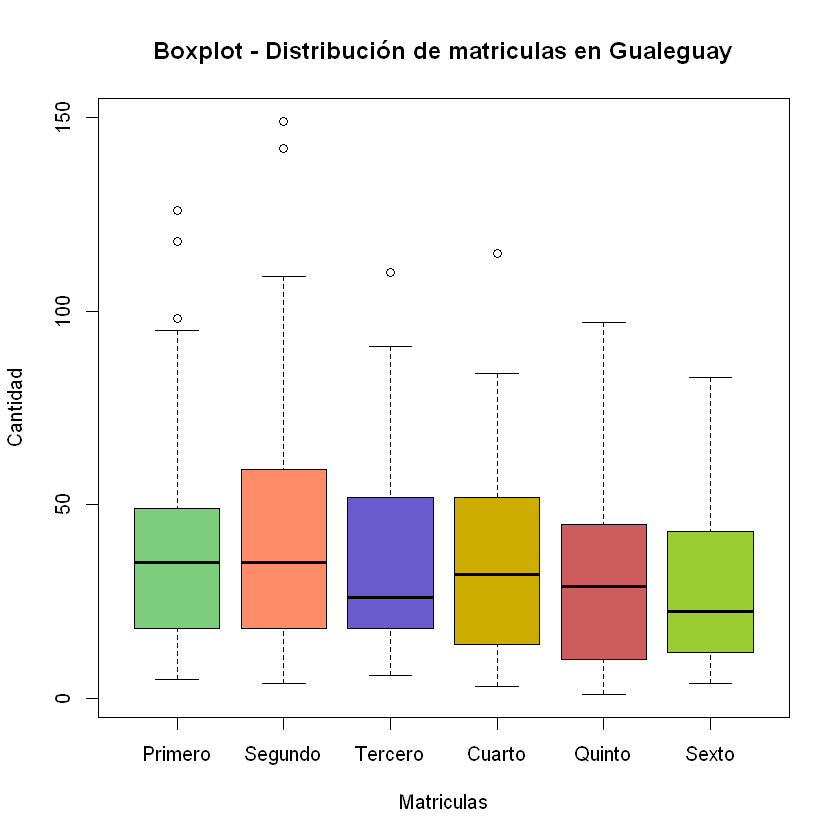

In [21]:
boxplot(aniosMatricula$primero,aniosMatricula$segundo,
aniosMatricula$tercero, aniosMatricula$cuarto,
aniosMatricula$quinto, aniosMatricula$sexto,
col = c("palegreen3",
"salmon1","slateblue", "gold3", "indianred",
"olivedrab3","palegreen2"),
ylab = "Cantidad",
xlab="Matriculas",
main = "Boxplot - Distribución de matriculas en Gualeguay")    

nombres <- c("Primero", "Segundo", "Tercero", "Cuarto", "Quinto", "Sexto", "Septimo")
axis(side = 1, at = 1:length(nombres), labels = nombres)


---

# **Análisis Bivariado Cualitativo**

**Modifico variable "resultado" en primaria y secundaria que depende de cuál caso se cumple en la variable "promedio"**

In [22]:
original <- original %>% mutate(resultado = case_when(
promedio >= 6 & notaTercerT >= 6 ~ "Aprobado",
promedio < 6 | notaTercerT < 6 ~ "Rinde",
TRUE ~ "sin registro completo"))

primaria <- primaria %>% mutate(resultado = case_when(
promedio >= 6 & notaTercerT >= 6 ~ "Aprobado",
promedio < 6 | notaTercerT < 6 ~ "Rinde",
TRUE ~ "sin registro completo"))

#checkeo que se haya creado la nueva variable
ftable(original$resultado)
ftable(primaria$resultado)

 Aprobado Rinde sin registro completo
                                     
    78799 38061                  4843

 Aprobado Rinde sin registro completo
                                     
    23311  9716                  3477

**Creo la variable 'desempeño' en primaria y secundaria para clasificar las notas obtenidas** 

In [23]:
original <- original %>% mutate(desempenio = case_when(
    promedio < 4 ~ "Insuficiente",
    promedio >= 4 & promedio < 6 ~ "Regular",
    promedio >= 6 & promedio < 7 ~ "Aprobado",
    promedio >= 7 & promedio < 8 ~ "Bueno",
    promedio >= 8 & promedio < 9 ~ "Muy bueno",
    promedio >= 9 & promedio <= 10 ~ "Distinguido",
    TRUE ~ "Sin registro completo"))

primaria <- primaria %>% mutate(desempenio = case_when(
    promedio < 4 ~ "Insuficiente",
    promedio >= 4 & promedio < 6 ~ "Regular",
    promedio >= 6 & promedio < 7 ~ "Aprobado",
    promedio >= 7 & promedio < 8 ~ "Bueno",
    promedio >= 8 & promedio < 9 ~ "Muy bueno",
    promedio >= 9 & promedio <= 10 ~ "Distinguido",
    TRUE ~ "Sin registro completo"))

#checkeo que se haya creado la nueva variable
ftable(original$desempenio)
ftable(primaria$desempenio)

 Aprobado Bueno Distinguido Insuficiente Muy bueno Regular Sin registro completo
                                                                                
    16267 22860       34343          386     34333    8526                  4988

 Aprobado Bueno Distinguido Muy bueno Sin registro completo
                                                           
     3323  6337       12311     11023                  3510

**Creo la variable 'eximido'. Mide si un estudiante no se llevó ninguna materia, se llevó entre 1 y 3 materias, se llevó más de tres materias.**

In [25]:
original <- original %>%
  group_by(documento) %>%
  mutate(asignaturasDesaprobadas = sum(str_detect(resultado, regex("Rinde", ignore_case = TRUE))))

original <- original %>% 
  mutate(eximido = case_when(
    asignaturasDesaprobadas == 0 ~ "Eximido",
    asignaturasDesaprobadas < 4 & asignaturasDesaprobadas >= 1 ~ "ParcialmenteEximido",
    asignaturasDesaprobadas > 3  ~ "NoEximido",
    TRUE ~ "sin registro completo"
))

primaria <- primaria %>%
  group_by(documento) %>%
  mutate(asignaturasDesaprobadas = sum(str_detect(resultado, regex("Rinde", ignore_case = TRUE))))
primaria <- primaria %>% mutate(eximido = case_when(
  asignaturasDesaprobadas == 0 ~ "Eximido",
  asignaturasDesaprobadas < 4 & asignaturasDesaprobadas >= 1 ~ "ParcialmenteEximido",
  asignaturasDesaprobadas > 3  ~ "NoEximido",
  TRUE ~ "sin registro completo"
))



#checkeo que se haya creado la nueva variable
ftable(original$eximido)
ftable(primaria$eximido)

 Eximido NoEximido ParcialmenteEximido
                                      
   21565     57511               42627

 Eximido NoEximido ParcialmenteEximido
                                      
   15907      5991               14606

### **Realizo un KRUSKAL test (no parametrico) para la variable nueva 'eximido'**
### **¿Hay diferencias significativas entre las medias de los valores de eximido?**
### H0: No hay diferencias entre las medias de los valores de eximido.
### H1: Existen diferencias entre las medias de los valores de eximido.


In [27]:
#filtro la variable eximido y promedio
eximidos <- primaria$eximido
prom <- primaria$promedio
#las junto en un nuevo dataframe
data_eximidos <- data.frame(prom,eximidos)
data_eximidos <- na.omit(data_eximidos)
head(data_eximidos)

prom,eximidos
8.00,ParcialmenteEximido
8.00,ParcialmenteEximido
9.33,ParcialmenteEximido
7.33,ParcialmenteEximido
7.33,ParcialmenteEximido
8.33,ParcialmenteEximido


Exploro los datos y visualizo las distribuciones

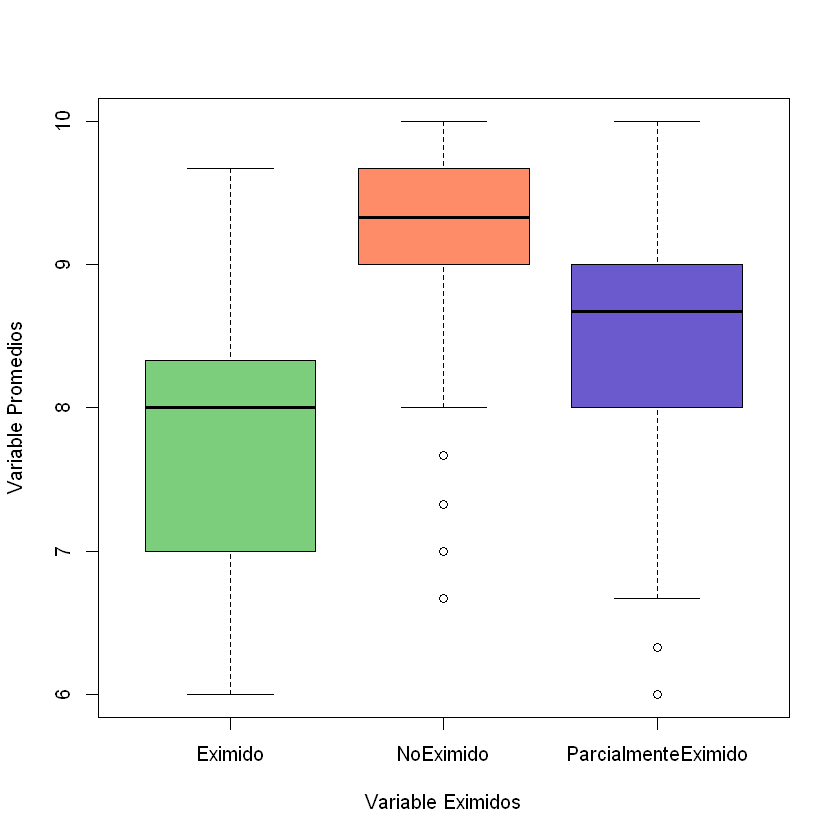

In [28]:
boxplot(data_eximidos$prom ~ data_eximidos$eximidos, col = c("palegreen3", "salmon1","slateblue"), ylab = "Variable Promedios", xlab="Variable Eximidos")

Calculamos la media de cada población

In [ ]:
data_eximidos %>% group_by(eximidos) %>% summarise(mean = round(mean(prom),1), datos = n())

eximidos,mean,datos
Eximido,7.6,6525
NoEximido,7.2,18445
ParcialmenteEximido,7.4,10191


Como mis poblaciones son de mas de 5000 datos, uso lillie test para verificar la distribución normal

In [29]:
library(nortest)
lillie.test(data_eximidos$prom[data_eximidos$eximidos == "Eximido"])
lillie.test(data_eximidos$prom[data_eximidos$eximidos == "NoEximido"])
lillie.test(data_eximidos$prom[data_eximidos$eximidos == "ParcialmenteEximido"])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_eximidos$prom[data_eximidos$eximidos == "Eximido"]
D = 0.14066, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_eximidos$prom[data_eximidos$eximidos == "NoEximido"]
D = 0.18476, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_eximidos$prom[data_eximidos$eximidos == "ParcialmenteEximido"]
D = 0.13752, p-value < 2.2e-16


**No se verifica que haya normalidad en la distribución. Uso kruskal test (no parametrico).**

In [30]:
kruskal.test(prom ~ eximidos)


	Kruskal-Wallis rank sum test

data:  prom by eximidos
Kruskal-Wallis chi-squared = 12314, df = 2, p-value < 2.2e-16


Existe la suficiente evidencia estadistica para rechazar H0. Por ende, concluimos que si existen diferencias significativas entre la variable eximido. 

---

#### **Realice un Box Plot comparativo que muestre las notas de matemática de los diferentes años de primaria**

Adding missing grouping variables: `documento`


Warning message:
"Removed 1351 rows containing non-finite values (stat_boxplot)."

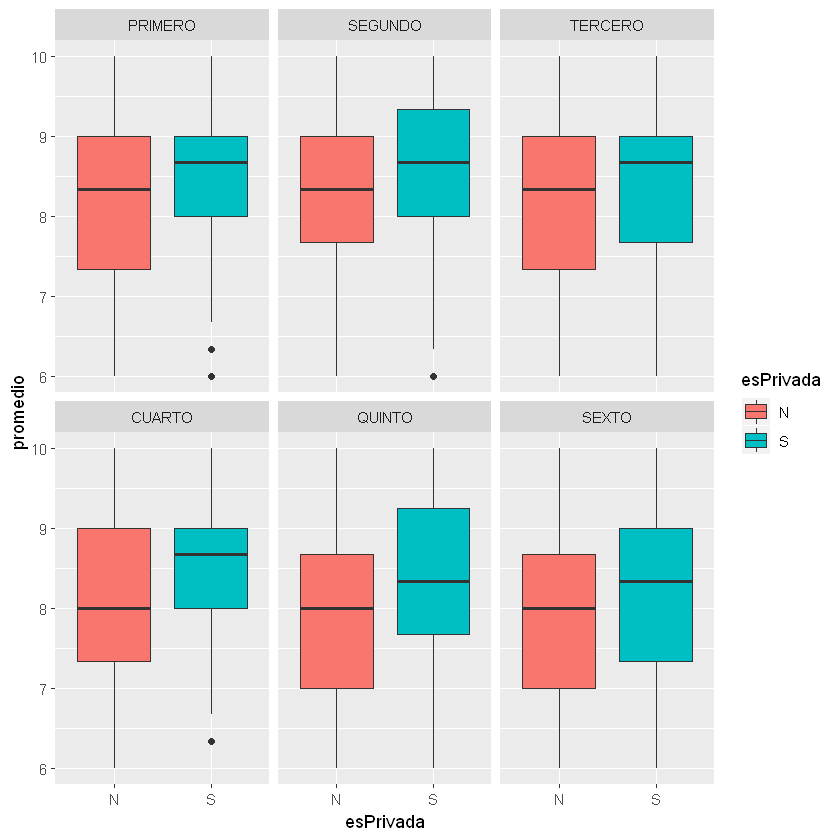

In [31]:
#Filtro por asignatura. En este caso matemática.
promMatematica <- filter(primaria, asignatura == "MATEMATICA")
#Selecciono del dataframe 'promMatematica' las variables que voy a usar.
promMatematica <- select(promMatematica, promedio, anioCursado,esPrivada)

#Hago que los valores de anioCursado estén ordenados (primero, segundo, etc)
promMatematica$anioCursado <- factor(promMatematica$anioCursado, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO'))

#Grafico un boxplot de los promedios en Matemática comparando los sectores (publico o privado) en cada año
ggplot (promMatematica, aes (x = esPrivada, y = promedio, fill = esPrivada)) + 
  geom_boxplot () +
   facet_wrap (~ promMatematica$anioCursado) #graficos por separado


Mediante estos gráficos, se puede observar que en todos los años, los promedios más altos de Matemática se encuentran en las escuelas Privadas. 

---

### **En caso de observar diferencias, realice un contraste que permita medir si las diferencias son significativas.**
### H0: no hay diferencias entre los promedios de Matemática según escuelas públicas y privadas.
### H1: Existen diferencias entre los promedios de Matemática segun escuelas públicas y privadas.

In [57]:
promMatematica  <- filter(primaria, asignatura == "MATEMATICA")
promMatematica  <- select(promMatematica, promedio, esPrivada)

Adding missing grouping variables: `documento`


In [58]:
privada <- promMatematica$esPrivada
prom <- promMatematica$promedio
#las junto en un nuevo dataframe
data_privado <- data.frame(prom,privada)
data_privado <- na.omit(data_privado)
head(data_privado)

prom,privada
7.33,N
8.67,N
9.33,N
9.00,N
9.00,N
8.67,N


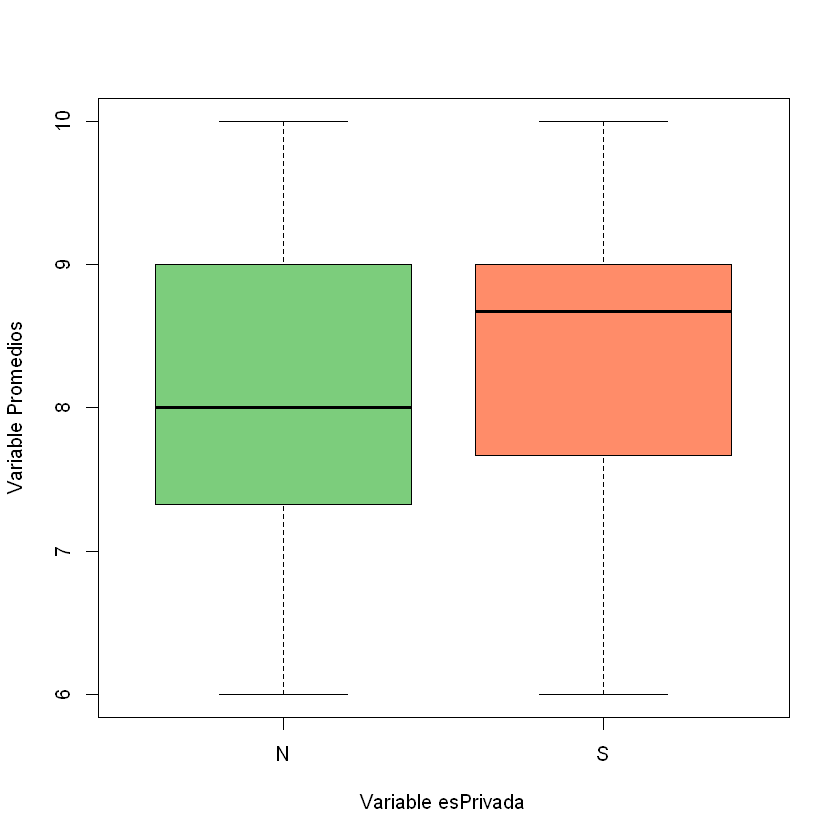

In [59]:
boxplot(data_privado$prom ~ data_privado$privada, col = c("palegreen3", "salmon1","slateblue"), ylab = "Variable Promedios", xlab="Variable esPrivada")

In [60]:
wilcox.test(prom ~ privada)


	Wilcoxon rank sum test with continuity correction

data:  prom by privada
W = 2332188, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Hay evidencia estadística sufuciente para rechazar H0. Por ende conluyo que si existe una diferencia significativa entre las medias de las notas de Matemática entre las escuelas Privadas y Públicas.